* apply polynomial regression by taking two input features/predictors
* headbrain.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("headbrain.csv")
data.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
data.columns


Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [5]:
data.shape


(237, 4)

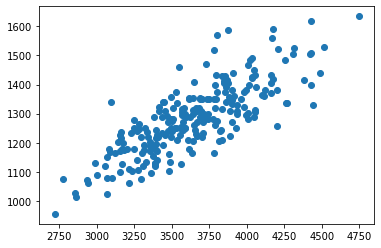

In [6]:
plt.scatter(data["Head Size(cm^3)"],data["Brain Weight(grams)"])
plt.show()

In [7]:
x = data[["Head Size(cm^3)"]]
y = data["Brain Weight(grams)"]


In [8]:

from sklearn.preprocessing import PolynomialFeatures


In [9]:

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)


In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
model = LinearRegression()
model.fit(x_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = model.predict(x_poly)
y_pred


array([1506.69192887, 1313.27584502, 1439.53126348, 1322.6935119 ,
       1418.57721582, 1275.40778678, 1324.61701619, 1268.77977598,
       1282.47423808, 1371.54440821, 1238.30136756, 1374.16268553,
       1289.22374179, 1426.244466  , 1335.87159664, 1346.35485044,
       1252.68761246, 1244.47407663, 1134.31688838, 1482.20604279,
       1346.83054064, 1386.81590695, 1329.17554501, 1306.46640745,
       1578.75634675, 1481.93428959, 1384.42263127, 1381.07708651,
       1241.26216938, 1418.08493515, 1325.09749472, 1327.25776724,
       1400.52916779, 1414.64656383, 1413.91145405, 1331.56972993,
       1260.52719772, 1315.69754785, 1208.0269377 , 1251.37080183,
       1366.78842271, 1254.78833427, 1453.3369631 , 1329.17554501,
       1343.26140253, 1383.94434953, 1451.53054364, 1157.09991423,
       1289.47257828, 1290.21861419, 1349.92131758, 1326.53801173,
       1441.81225375, 1390.89223161, 1378.69063554, 1242.33487668,
       1349.68363217, 1415.87305101, 1360.37369077, 1296.40889

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score:",r2_score(y,y_pred))
print("RMSE :",(mean_squared_error(y,y_pred)))


r2_score: 0.6430704841260595
RMSE : 5147.179949312437


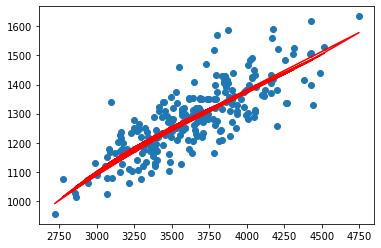

In [14]:
plt.scatter(data["Head Size(cm^3)"],data["Brain Weight(grams)"])
plt.plot(x,y_pred,c = "r")
plt.show()


In [15]:
acc = []
for i in range(2,15):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly,y)
    y_pred = model.predict(x_poly)
    acc.append(r2_score(y,y_pred))
acc

[0.6416304461195703,
 0.6430704841260595,
 0.6435112778593635,
 0.6437052787942671,
 0.6438594313982982,
 0.6439528406059459,
 0.6439714184736727,
 0.6439060759009796,
 0.6437475933363844,
 0.6434804941379746,
 0.6430781863443367,
 0.6425008180099926,
 0.6416961628759366]

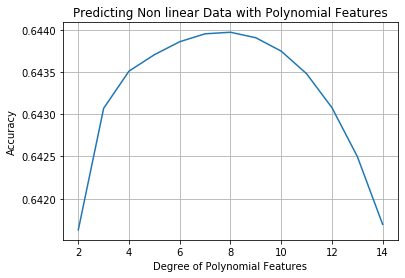

In [16]:
plt.plot(np.arange(2,15),acc)
plt.xlabel("Degree of Polynomial Features")
plt.ylabel("Accuracy")
plt.grid()
plt.title("Predicting Non linear Data with Polynomial Features")
plt.show()
